Experiment 6    

Aim:- Implementation of Clustering Algorithm for unsupervised classification.

LO:- LO6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("wine-clustering.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
hue = df['Hue'].values
color_int = df['Color_Intensity'].values
X = np.array(list(zip(hue, color_int)))
X

array([[ 1.04    ,  5.64    ],
       [ 1.05    ,  4.38    ],
       [ 1.03    ,  5.68    ],
       [ 0.86    ,  7.8     ],
       [ 1.04    ,  4.32    ],
       [ 1.05    ,  6.75    ],
       [ 1.02    ,  5.25    ],
       [ 1.06    ,  5.05    ],
       [ 1.08    ,  5.2     ],
       [ 1.01    ,  7.22    ],
       [ 1.25    ,  5.75    ],
       [ 1.17    ,  5.      ],
       [ 1.15    ,  5.6     ],
       [ 1.25    ,  5.4     ],
       [ 1.2     ,  7.5     ],
       [ 1.28    ,  7.3     ],
       [ 1.07    ,  6.2     ],
       [ 1.13    ,  6.6     ],
       [ 1.23    ,  8.7     ],
       [ 0.96    ,  5.1     ],
       [ 1.09    ,  5.65    ],
       [ 1.03    ,  4.5     ],
       [ 1.11    ,  3.8     ],
       [ 1.09    ,  3.93    ],
       [ 1.12    ,  3.52    ],
       [ 1.13    ,  3.58    ],
       [ 0.92    ,  4.8     ],
       [ 1.02    ,  3.95    ],
       [ 1.25    ,  4.5     ],
       [ 1.04    ,  4.7     ],
       [ 1.19    ,  5.7     ],
       [ 1.09    ,  6.9     ],
       [

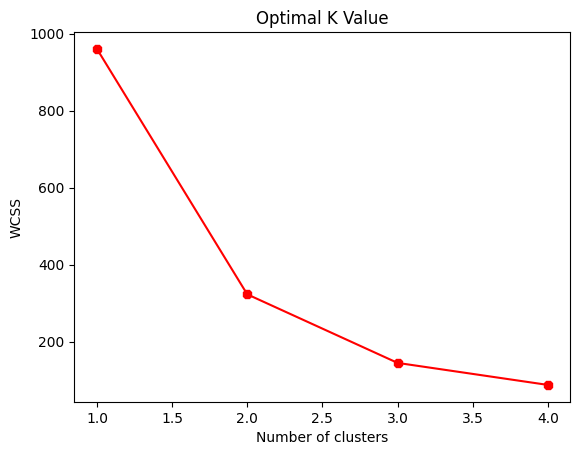

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,5):
    km=KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,5),wcss,color="red", marker ="8")
plt.title('Optimal K Value')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
model=KMeans(n_clusters=3, random_state=0)
y_means = model.fit_predict(X)

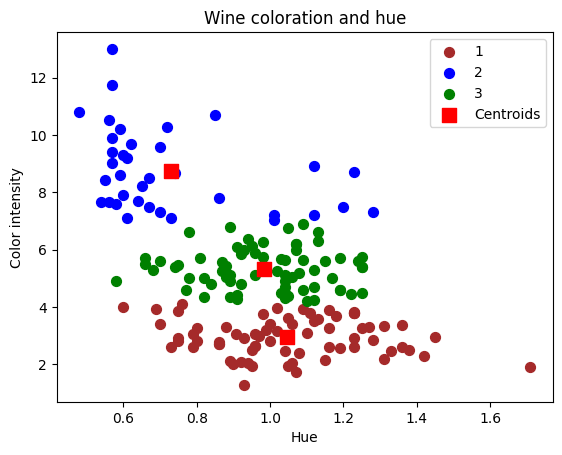

In [11]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='brown',label='1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='3')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=100,marker='s', c='red', label='Centroids')
plt.title('Wine coloration and hue')
plt.xlabel('Hue')
plt.ylabel('Color intensity')
plt.legend()
plt.show()